In [1]:
# 범주형... category 데이터
# 남/녀, 정품/가품, 0,1  : 바이너리 데이터.. 이진분류
# 다중 분류... 혈액형, 시도, 구군,, 컬러
# 수치화.. 머신러닝을 위해서... 방정식을 풀기위해..
# one-hoe encoding : 범주형 데이터의 개수만큼 가변수를 생성해서 존재 유무를 1또는 0으로 표현

In [2]:
# 남, 여    : 0 , 1
# red, green , blue  : 0, 1 , 2 
# red : [1,0,0]
# green : [0,1,0]
# blue : [0,0,1]

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame({
    'source':[0,1,2],
    'target':[2,2,3],
    'weight':[3,4,5],
    'color' : ['red','blue','blue']
})
df

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  3 non-null      int64 
 1   target  3 non-null      int64 
 2   weight  3 non-null      int64 
 3   color   3 non-null      object
dtypes: int64(3), object(1)
memory usage: 224.0+ bytes


In [6]:
pd.get_dummies(df)

,source,target,weight,color_blue,color_red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [7]:
pd.get_dummies(df['color'])

,blue,red
0,0,1
1,1,0
2,1,0


In [8]:
pd.get_dummies(df[['color']])

,color_blue,color_red
0,0,1
1,1,0
2,1,0


In [9]:
# 필요에 따라서 정수형을 객체로 변경해서 처리
# weight는 숫자로 되어 있지만 기수형 데이터
# 데이터를 M,L,XL로 변경해서 원핫인코딩

In [10]:
weight_dict = {3:'M', 4:'L', 5:"XL"}
df['weight_sign'] = df['weight'].map(weight_dict)
df

,source,target,weight,color,weight_sign
0,0,2,3,red,M
1,1,2,4,blue,L
2,2,3,5,blue,XL


In [14]:
pd.get_dummies(df['weight_sign'])

,L,M,XL
0,0,1,0
1,1,0,0
2,0,0,1


In [16]:
df = pd.concat([df,pd.get_dummies(df['weight_sign'])], axis=1 )
df

,source,target,weight,color,weight_sign,L,M,XL
0,0,2,3,red,M,0,1,0
1,1,2,4,blue,L,1,0,0
2,2,3,5,blue,XL,0,0,1


In [19]:
# 0 ~ 100 사이의 임의의 값으로  데이터를 30개만 추출해서 
import random
raw_data = {
    'score' : [ random.randrange(100) for i in range(30)]
}
df = pd.DataFrame(raw_data)
df.head()

,score
0,95
1,12
2,9
3,9
4,60


In [20]:
# 연속적인 수치형 데이터를 범주형 데이터로 변경
# 0~25,25~50,50~75,75~100 : 'low','okay','good','great'

In [22]:
binds = [0,25,50,75,100]
gnames = ['low','okay','good','great']
df['category'] = pd.cut(df['score'], binds, labels=gnames)
df

,score,category
0,95,great
1,12,low
2,9,low
3,9,low
4,60,good
5,44,okay
6,36,okay
7,10,low
8,13,low
9,40,okay


In [23]:
# scaling : 데이터의 범위를 맞춘다.
# 데이터의 특징 또는 형태등을 변경하지 않는 상태에서 값의 범위만 일정하게 같이 맞춰주는 역활
# min-max scaling
# 최소값-최대값 정규화
# 최소값과 최대값을 기준으로 0에서 1 또는 0에서 지정한 값까지 값의 크기를 변화
# xi - min(x) / max(x) - min(x)
# z-score 정규화(z-score normalization)  : 기존값을 표준 정규분포값으로 변환
# xi - 열의평균 / 열의표준편차

In [26]:
df = pd.DataFrame({
    'a':[random.randrange(20) for i in range(5)],
    'b':[random.randrange(100,200) for i in range(5)],
    'c':['big','small','big','small','samll']
})
df

,a,b,c
0,11,147,big
1,17,170,small
2,19,139,big
3,15,161,small
4,0,116,samll


In [29]:
df['a'] - df['a'].min()

0    11
1    17
2    19
3    15
4     0
Name: a, dtype: int64

In [30]:
#  ai - min(a) / max(a) - min(a)
(df['a'] - df['a'].min() ) / (df['a'].max() - df['a'].min() )


0    0.578947
1    0.894737
2    1.000000
3    0.789474
4    0.000000
Name: a, dtype: float64

In [32]:
# z-score 적용
# xi - 열의평균 / 열의표준편차
(df['a'] - df['a'].mean())  / df['a'].std()

0   -0.185761
1    0.610357
2    0.875729
3    0.344984
4   -1.645309
Name: a, dtype: float64

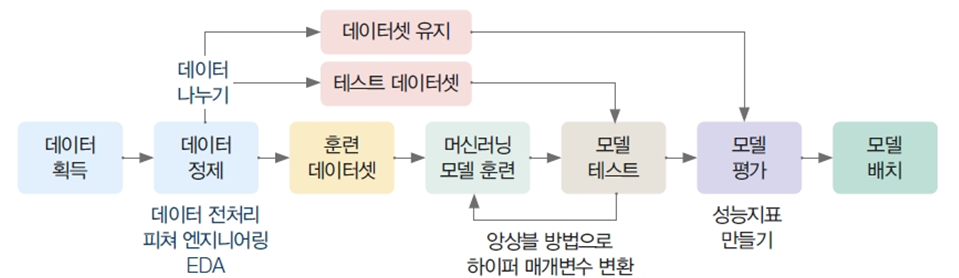

In [34]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set(style = 'whitegrid', color_codes=True)

In [40]:
# 두 개의 csv 읽어서 하나의 df로 만들기
df_train = pd.read_csv('/content/train.csv')
df_test =  pd.read_csv('/content/test.csv')
df = pd.concat([df_train,df_test])
df.head()
# 데이터분석시에는 각 컬럼에대한 표를 만든다  - 데이터 노트 - 
# 변수명  의미   데이터 타입  값 종류

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
# 데이터의 모양을 확인
df.head(2).T

,0,1
PassengerId,1,2
Survived,0.0,1.0
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833


In [45]:
# 결측치 확인 전략 - 비율을 확인하여 전략을 세움
# 판다스 옵션 조정 : 소수점 두번째 까지 출력
pd.options.display.float_format = '{:.2f}'.format

In [54]:
# 결측치값의 평균
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,True,False,False,False,True,False,False,False,False,True,False
414,False,True,False,False,False,False,False,False,False,False,False,False
415,False,True,False,False,False,False,False,False,False,False,True,False
416,False,True,False,False,False,True,False,False,False,False,True,False
